Machine Leaning models 🤖



Machine Leaning models

<div class="alert alert-block alert-info">
<b> Scope of this class: </b>
In this session we will use, study and implement classical machine learning models on simple data. 
</div>

The last exercises of the session will be devoted to the implementation of more complex models and the use of a two in order to solve a task on a real dataset.



The objectives of this lab: **Discover, use and implement from scratch many classical machine learning algorithms !**

Note that in machine learning and in informatic in general, when you do not know how to do something or how does something work, your first reflex should be to look on **the documentation** and more generally on internet. First, all the documentation of the libraries you will use is there. Moreover, Python has a huge community (one of its strength) and therefore a lot of trouble you may have has already been resolved on a forume (such as StackOverflow). 

**However**, you should know that code you found on forum might be under some copyrights it is the case for instance on all the code avaible on StackOverflow

To find the documentation on a class, a function or a method from a library, most of the time, searching the name of the library and the name of the method will give you the documentation as the first link.


In [21]:
from typing import Protocol, Tuple, List #Typing library : In python the types of variables
# are not declared explicitly.
#However, it is sometimes useful to specify them to improve the readability of the code. 
#hi

In [2]:
import math

In [3]:
import numpy as np 

In [4]:
import seaborn as sns
sns.set() # graphical library

In [5]:
# Scikit learn is the reference library in python for using machine learning models (mainly on tabular data)
import sklearn
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
import matplotlib.pyplot as plt
# can use named colors or HTML codes
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
cmap = sns.dark_palette((200, 1000,45), input="husl",as_cmap=True)

## 1.0 Tutorial

This first exercise has two purposes: 

- To introduce you to the notion of class with a data science-oriented practical case

- To see under the hood the notion of data scaling


Many normalization methods are possible, but in 99% of the use cases.
you will use the `StandardScaler` : $$Z= \frac{X - \bar{X}}{\sigma(X)}$$ or `MinMaxScaler`: $$S = \frac{X - \min(X)}{\max(X) - \min(X)}$$.
The first set your data between 0 and 1 and the second to mean 0 and standard deviation 1. 

Why should you scale your data?

Scale effects can interfere with the training of many estimators. It is necessary to scale the data where the estimator uses distance or gradient during training.

Advice: always normalize your data except if you want to use an algorithm based on decision trees

<div class="alert alert-block alert-info">
    
<b> Exercise 1.0.1 : </b>

Implement the two normalization methods using the object formalism.


</div>

In [7]:
class Normalizer:
    def __init__(self):
        self.mean = None
        self.std = None
        self.epsilon = 1e-6
    
    def fit(self, X: np.array, y=None): # y=None is a scikit learn convention
        # Compute the mean for each columns
        self.mean = ...
        # Compute the standard deviation for each columns
        self.std = ...
        return self
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        X_norm = ... # safe division
        return X_norm

In [8]:
class MinMaxNormalizer:
    def __init__(self):
        self.min = None
        self.max = None
        self.epsilon = 1e-6
    
    def fit(self, X, y=None):
        # the floor is yours
        ...
    
    def transform(self, X:np.ndarray) -> np.ndarray:
        # (X - X_min) / (X_max - X_min) 
        ...

## 1.1 Generate the toy dataset

In [9]:
from sklearn.metrics import mean_squared_error, accuracy_score

def eval_model(Y_pred:np.ndarray, Y_true:np.ndarray, classification:bool=True):
    metric = accuracy_score if classification else mean_squared_error
    score = metric(Y_true, Y_pred)
    return f"The score is {score:.2f}"

In [10]:
def generate_classification_dataset(mode: str = "train") -> Tuple[np.ndarray, np.ndarray]:
    random_state = 42 if mode == "train" else 1337
    X, y = make_moons(n_samples=1000,random_state=random_state, noise=0.20)
    return X, y
        

In [11]:
def generate_regression_dataset(mode: str = "train") -> Tuple[np.ndarray, np.ndarray]:
    random_state = 42 if mode == "train" else 1337
    np.random.seed(random_state)
    X_1 = np.random.uniform(size = 1000, low = 0, high = 25)
    X_2 = np.random.uniform(size = 1000, low = 0, high = 8)
    gaussian_noise = np.random.normal(loc=0, scale=4, size=1000)
    Y = 2 * X_1 - 3 * X_2 + gaussian_noise
    X = np.stack([X_1, X_2], axis =-1)
    return X, Y

<div class="alert alert-block alert-info">
    
<b> Exercise 1.1.1 : </b>

Using the previous functions : Generate a train and test dataset for the two types of task (classification and regression)


</div>

In [12]:
# Generate
X_train_clf, Y_train_clf = generate_classification_dataset(mode="train")
X_test_clf, Y_test_clf = generate_classification_dataset(mode="test")

X_train_reg, Y_train_reg = generate_regression_dataset(mode="train")
X_test_reg, Y_test_reg = generate_regression_dataset(mode="test")



<div class="alert alert-block alert-info">
    
<b> Exercise 1.1.2 : </b>

Use your favorite normalization to scale your data .


</div>

In [13]:
# Scale
#X_train_clf_norm = ...
#X_test_clf_norm = ...

#X_train_reg_norm = ...
#X_test_reg_norm = ...

In [14]:
def plot_dataset(X:np.ndarray, Y: np.ndarray, colormap: np.ndarray = colormap,classification=True) -> None:
    if classification:
        plt.scatter(X[:, 0], X[:, 1], color=colormap[Y],s=10)
    else:
        
        points = plt.scatter(X[:, 0], X[:, 1], c=Y, s=15, cmap=cmap)
        plt.colorbar(points)

<div class="alert alert-block alert-info">
    
<b> Exercise 1.1.3 : </b>

Briefly explain this dataset (features and the machine learning task to be performed).


</div>

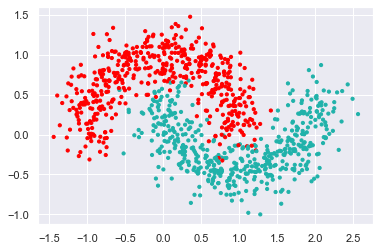

In [15]:
plot_dataset(X=X_train_clf, Y=Y_train_clf, colormap=colormap)

<div class="alert alert-block alert-info">
    
<b> Exercise 1.1.4 : </b>

Briefly explain the dataset (features and the machine learning task to be performed).


</div>

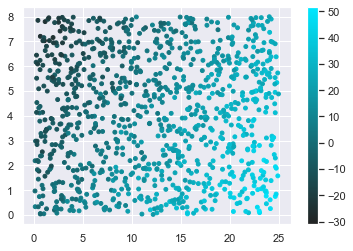

In [16]:
plot_dataset(X=X_train_reg, Y=Y_train_reg, colormap=colormap,classification=False)

## 1.2 General information on machine learning models

It is possible to implement a machine learning model in many ways. However, there are **code standards** that allow for readability and understanding by all. It is common to implement a machine learning model with the sklearn framework. We will ask you to implement your methods in the form of a **python class** with at least two methods: the **fit** method and the **predict** method.

In [17]:
class MachineLearningModel(Protocol): 
    def fit(self, X:np.ndarray, y:np.ndarray, *args, **kwargs):
        ...
    def predict(X: np.ndarray, *args, **kwargs) -> np.ndarray:
        ...

In [18]:
def plot_decision_boundaries(X: np.ndarray, Y: np.ndarray, classifier: MachineLearningModel):
    # Plotting decision regions
    f = plt.figure()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plot_dataset(X=X, Y=Y)
    plt.show()

A machine learning model is a function  $f_\theta$ parametrized by a set of parameters $\theta$.
    
* Train a model means : Find the best $\theta$ parameters $\theta^*$ that minimize a given loss function $\mathcal{L}$.


* The loss function $\mathcal{L}$ allows to evaluate the prediction error of the model with respect to a ground truth or label $y$ :  $$err(y,\hat{y}) = \mathcal{L}(y,f_\theta(x))$$


* These theta parameters can be found iteratively by following the opposite direction of the gradient of the loss function.
\begin{equation}
\theta_{i+1}=\theta_{i}-\tau_{i} \nabla \mathcal{L}\left(\theta_{i}\right)
\end{equation}



<img src="./images/ball.png" alt="tree" width="600"/>
source:rasbt

<div class="alert alert-block alert-warning">
    
<b> Example : </b>
Let's imagine that we want to train a model to predict the life expectancy $y$ according to some biological data $x$ : age, weight, height, blood profile ...
We have to find by training the set of parameters $\theta$ of our model $f_\theta$ which minimizes the prediction error. This error is defined as the distance between the predicted life expectancy $\hat{y}$ and the true life expectancy $y$ : 
    
$$err(y,\hat{y}) = \mathcal{L}(y,f_\theta(x))$$ with : $$\mathcal{L}(y,\hat{y}) = \Vert y - \hat{y} \Vert_2$$ (MSE loss)
   

## 1.3 Machine learning models implementation

### 1.3.1 A first classification model: Logistic regression

The logistic regression model is the basic model in binary classification. It has the advantage of being very simple and easily explained. Despite its simplicity, it is widely used, especially in the banking world.
\begin{equation}
S\left(X^{(i)}\right)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\theta_{3} x_{3}+\ldots .+\theta_{n} x_{n} = \sum_{i=0}^{n+1}\left(\theta_{i} x_{i}\right) = \Theta X^{(i)}
\end{equation}
with $\theta_i \in \mathbf{R}$ for all $i \in 1,2,\ldots,n$.

$\Theta$ is the vector of parameters to be estimated and $S$ is called the score function.
The idea of the logistic regression is to find coefficients $\theta_1,\theta_2,\ldots,\theta_n$ such that 
* $S\left(X^{(i)}\right)>0$ when the label of $i$ is $1$.
* $S\left(X^{(i)}\right)<0$ when the label of $i$ is $0$.

However, a classification model should return a probability of belonging to a class and not a score.
To go from a score function to a probability we will use the logistic function (or sigmoid) : 

\begin{equation}
\operatorname{Sigmoid}(x)= \sigma(x)=\frac{1}{1+e^{-x}}
\end{equation}
The probability that individual $i$ belongs to class $1$ is therefore modeled by :

\begin{equation}
P(y=1 \mid X^{(i)} , \Theta) = \sigma(S\left(X^{(i)}\right))
\end{equation}
\begin{equation}
P(y=0 \mid X^{(i)} , \Theta) = 1-P(y=1 \mid X^{(i)} , \Theta) = 1 - \sigma(S\left(X^{(i)}\right))
\end{equation}

In practice if $X$ is the sample matrix, $\Theta$ the parameters vector and $\sigma$ the sigmoid function.
So, the logistic model is defined as :

<span style="color:red"> $$M(X,\Theta) = \sigma(X \Theta) $$</span>

The best $\theta$ parameters can be found iteratively by following the opposite direction of the gradient of the loss function defined as follow :

\begin{equation}
L_{\mathrm{CE}}(\hat{y}, y)=-\log p(y \mid x)=-[y \log \hat{y}+(1-y) \log (1-\hat{y})]
\end{equation}
this loss is called the cross-entropy.

\begin{equation}
L_{\mathrm{CE}}(\hat{y}, y)=-[y \log \sigma(\theta \cdot x)+(1-y) \log (1-\sigma(\theta \cdot x))]
\end{equation}

<span style="color:blue">\begin{equation}
\frac{\partial L_{\mathrm{CE}}(\hat{y}, y)}{\partial \theta}=[y-\sigma(\theta \cdot x)] x=[\hat{y}-y] x
\end{equation}</span>

**The gradients are noted in a vector manner to facilitate the transition to the implementation**.

<div class="alert alert-block alert-warning">

<b> Note : </b>
    In machine learning, understanding the dimension of tensors is essential. This allows to better understand the algorithms. Knowing the dimensions in Machine Learning is a bit like dimensional analysis in physics. If I know the shape of my tensors and the operations I perform then I can understand the output shape.

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.1 : </b>

What is the dimension $X$, $\Theta$ and the output $\hat{y}$ of the model ?


</div>

#### Sklearn logistic regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.2 : </b>

1. Train a sklearn logistic regression model on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data using the `eval_model` method defined above.

4. Try to get the best score and the most beautiful decision boundaries.


</div>

In [19]:
# Write your solution here

#### Homemade logistic regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.3 : </b>

Implement logistic regression from scratch.


</div>

In [20]:
# exercice
class Sigmoid:
    def __call__(self,x):
        return ...
class HomemadeLogisticRegression(AibtMachineLearningModel):
    """ Logistic Regression classifier.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If
        false then we use batch optimization by least squares.
    """
    def __init__(self, learning_rate=.1):
        self.param = None
        self.learning_rate = ...
        self.sigmoid = ...

    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.param = np.random.uniform(..., ..., (...,))

    def fit(self, X, y, n_iterations=4000):
        self._initialize_parameters(X) # Initially the theta parameters are chosen randomly.
        # Tune parameters for n iterations
        for i in range(n_iterations):
            # Make a new prediction
            y_pred = ... # Apply the red equation of the logistic model
            # Move against the gradient of the loss function with
            # respect to the parameters to minimize the loss
            self.param -= ... # Tips : Have a look to the blue equation
    def predict(self, X):
        y_pred = ... # Predict the class of x_i
        return y_pred



NameError: name 'AibtMachineLearningModel' is not defined

In [ ]:
# %load solutions/logistic.py

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.4 : </b>

1. Train your homemade logistic regression model on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data `eval_model` method defined above.



</div>

In [ ]:
# Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.5 : </b>

In your mind, why are the decision boundaries and score between your model and the sklearn model different ?


</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.6 : </b>

Why is it important to normalize your data for logistic regression?

</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.7 : </b>

How can you interpret the model coefficient's ?

</div>

Write your solution here

### 1.3.2 A first regression model: Linear regression

Previously you have seen the logistic regression. Linear regression is its equivalent for classification problems.
If you understand logistic regression then this part will be super simple!
The simple linear regression model is the basic model simple regression. It has the advantage of being very simple and easily explained. Despite its simplicity, it is widely used, especially in physics, statistics and biology.
The prediction for a sample $X^{(i)}$ is defined as :
\begin{equation}
S\left(X^{(i)}\right)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\theta_{3} x_{3}+\ldots .+\theta_{n} x_{n} + \beta = \sum_{i=0}^{n+1}\left(\theta_{i} x_{i}\right) + \beta = \Theta X^{(i)} + \beta
\end{equation}
with $\theta_i \in \mathbf{R}$ for all $i \in 1,2,\ldots,n$ and $\beta \in \mathbf{R}$ .
As you can see we have introduced a new beta variable. It corresponds to the **bias of the model**. For pedagogical reasons we did not introduce it for the logistic model (we considered the case where $\beta=0$)



In practice if $X$ is the sample matrix, $\Theta$ the parameters vector and $\sigma$ the sigmoid function.
So, the logistic model is defined as :

<span style="color:red"> $$M(X,\Theta,\beta) = X \Theta + \beta\mathbf{1} $$</span>
where $\mathbf{1} \in \mathbf{R}^N $ is the $N$-dimensional vector where all coordinates are equal to $1$, (with $N$ equal to the number of samples in $X$)

We want to find the best $\theta$ and $\beta$ such that : 
    $$L_{MSE}(\hat{y}-y)= \|\hat{Y}-Y\|^{2} = \|(X \Theta+\beta \mathbf{1})-Y\|^{2}$$

Thanks to the gradient algorithm, we can iteratively find the best parameters.

The partial derivative of the parameters $\theta$ is given by : 
<span style="color:blue">\begin{equation}
\frac{\partial L_{\mathrm{CE}}(\hat{y}, y)}{\partial \theta}=[y-\sigma(\theta \cdot x)] x=[\hat{y}-y] x
\end{equation}</span>

The partial derivative of the parameters $\beta$ is given by : 
<span style="color:blue">\begin{equation}
\frac{\partial L_{\mathrm{CE}}(\hat{y}, y)}{\partial \beta}=[y-\sigma(\theta \cdot x)] x=[\hat{y}-y]
\end{equation}</span>
<img src="./images/gradient_descent_parameter_a.gif" alt="tree" width="600"/>
source:baptiste-monpezat


**The gradients are noted in a vector manner to facilitate the transition to the implementation**.

#### Sklearn linear regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.2.1 : </b>

1. Train a sklearn linear regression model on the train data. 

2. Evaluate the model on the test data using the `eval_model` method defined above.

4. Try to get the best score.


</div>

In [ ]:
# Write your solution here

#### Homemade linear regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.2.2 : </b>

1. Train your homemade logistic regression model on the train data. 
2. Evaluate the model on the test data `eval_model` method defined above.



</div>

In [ ]:
class HomemadeSimpleLinearRegression(AibtMachineLearningModel):
    """ Logistic Regression classifier.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If
        false then we use batch optimization by least squares.
    """
    def __init__(self, learning_rate=1e-3):
        self.param = None
        self.bias = None
        self.learning_rate = learning_rate

    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.param = ...
        self.bias = ...
    def fit(self, X, y, n_iterations=4000):
        self._initialize_parameters(X) # Initially the theta parameters are chosen randomly.
        # Tune parameters for n iterations
        for i in range(n_iterations):
            # Make a new prediction
            y_pred = ...
            # Move against the gradient of the loss function with
            # respect to the parameters to minimize the loss
            self.param -= ...
            self.bias -= ...
    def predict(self, X):
        y_pred = ...
        return y_pred